# Indian Liver Patient Dataset (ILPD)

#Task 1:-Prepare a complete data analysis report on the given data.

#Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

#Task3:- Create an analysis to show on what basis you have designed your model.  

#This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Target" column is a class label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".
Columns:
●	Age of the patient
●	Gender of the patient
●	Total Bilirubin
●	Direct Bilirubin
●	Alkaline Phosphotase
●	Alamine Aminotransferase
●	Aspartate Aminotransferase
●	Total Protiens
●	Albumin
●	Albumin and Globulin Ratio
●	Target: field used to split the data 

In [2]:
# Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 


### Load the data

In [3]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', header=None)

## Exploratory Data Analysis (EDA)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
# Assigning column names

column_names= ["Age","Gender","Total_Bilirubin","Direct_Bilirubin",
           "Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens",
           "Albumin","Albumin_Globulin_Ratio","Liver_Disease"]
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None,names = column_names)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Liver_Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
data.shape

(583, 11)

In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Liver_Disease                 0
dtype: int64

In [11]:
data.index


RangeIndex(start=0, stop=583, step=1)

In [12]:
data.Liver_Disease.value_counts()#number of appearance for each label in Liver_disease column

1    416
2    167
Name: Liver_Disease, dtype: int64

In [13]:
data.ndim

2

In [14]:
data.values

array([[65, 'Female', 0.7, ..., 3.3, 0.9, 1],
       [62, 'Male', 10.9, ..., 3.2, 0.74, 1],
       [62, 'Male', 7.3, ..., 3.3, 0.89, 1],
       ...,
       [52, 'Male', 0.8, ..., 3.2, 1.0, 1],
       [31, 'Male', 1.3, ..., 3.4, 1.0, 1],
       [38, 'Male', 1.0, ..., 4.4, 1.5, 2]], dtype=object)

####  Here only Gender column is categorical. All others are numeric.

In [15]:
data.describe() #used to view some basic statistical details like percentile, mean, std etc.

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [16]:
# Printing How many Unique values present in each feature: 
for feature in data.columns:
    print(feature,":", len(data[feature].unique()))

Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_Globulin_Ratio : 70
Liver_Disease : 2


# Domain Analysis

# *What is liver disease?


Your liver is your body’s second-largest organ (after the skin). It sits just under your ribcage on the right side and is about the size of a football. The liver separates nutrients and waste as they move through your digestive system. It also produces bile, a substance that carries toxins out of your body and aids in digestion.

The term “liver disease” refers to any of several conditions that can affect and damage your liver. Over time, liver disease can cause cirrhosis (scarring). As more scar tissue replaces healthy liver tissue, the liver can no longer function properly. Left untreated, liver disease can lead to liver failure and liver cancer.

# *How common is liver disease?


Overall, about 1 in 10 Americans (30 million in total) have some type of liver disease. About 5.5 million people in the U.S. have chronic liver disease or cirrhosis.

Some types of liver disease are becoming more common in the U.S. because they are related to rising rates of obesity. An estimated 20% to 30% of adults have excess fat in their liver, a condition called non-alcohol rekated fatty liver disease (NAFD). This may be renamed metabolic-associated fatty liver disease (MAFLD) to reflect its relationship to metabolic syndrome and conditions like diabetes, high blood pressure, high cholesterol and obesity.

# *What causes different types of liver disease?


Different types of liver disease result from different causes. Liver disease may result from:

Viral infections: Hepatitis A, hepatitis B and hepatitis C are diseases caused by a viral infection.
Problems with your immune system: When your immune system mistakenly attacks your liver, it can cause autoimmune liver diseases. These include primary biliary cholangitis and autoimmune hepatitis.
Inherited diseases: Some liver problems develop because of a genetic condition (one you inherit from your parents). Inherited liver diseases include Wilson disease and hemochromatosis.
Cancer: When abnormal cells multiply in your liver, you may develop tumors. These tumors may be benign (noncancerous) or malignant (liver cancer).
Consuming too many toxins: Alcohol-related fatty liver disease is the result of alcohol use. Non-alcohol related fatty liver disease (NAFLD) results from consuming too much fat. NAFLD is becoming more common as rates of obesity and diabetes rise.

# *What are the symptoms of liver disease?


Some types of liver disease (including non-alcohol fatty liver disease) rarely cause symptoms. For other conditions, the most common symptom is jaundice — a yellowing of your skin and the whites of your eyes. Jaundice develops when your liver can’t clear a substance called bilirubin.

Other signs of liver disease may include:

Abdominal (belly) pain (especially on the right side).
Bruising easily.
Changes in the color of your urine or stool.
Fatigue.
Nausea or vomiting.
Swelling in your arms or legs (edema).

#Let's do some research on the data set and try to understand what each column is telling us.....

*Columns Name:------------------------------------


1.Age - Tells the person's age.

    

2.Gender - (Male or Female) Tells the person's gender. This is a very controversial column as we now know that there can be a spectrum of genders. But here we will only consider two genders.

    

3.Total_Bilirubin - 
A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.
Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. Your liver takes the bilirubin from your blood and changes its chemical make-up so that most of it is passed through your poop as bile.
If your bilirubin levels are higher than normal, it’s a sign that either your red blood cells are breaking down at an unusual rate or that your liver isn’t breaking down waste properly and clearing the bilirubin from your blood.Another option is that there’s a problem somewhere along the pathway that gets the bilirubin out of your liver and into your stool. 



4.Direct_Bilirubin - It's technically the same as "Total_Bilirubin". 
Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect, or unconjugated, bilirubin. All the bilirubin in your blood together is called total bilirubin. 

5.Alkaline_Phosphotase - .......

 Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins. The body uses ALP for a wide range of processes, and it plays a particularly important role in liver function and bone development.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.

6.Alamine_Aminotransferase - First of all it is "Alanine" and not "Alamine" .
Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. It was originally referred to as serum glutamic pyruvic transaminase (SGPT). Normally, a low level of ALT exists in the serum. ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage. 
    

7.Aspartate_Aminotransferase - 
 AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.
    
   

8.Total_protein - 
Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. It's used as part of your routine health checkup. It may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease.

   

9.Albumin - 
I think it's related to the protein in our bodies....

    

10.Albumin_and_Globulin_Ratio - 
The Albumin to Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin. The ratio can be interpreted only in light of the total protein concentration. Very generally speaking, the normal ratio in most species approximates 1:1.
    
   

11.Liver_disease- 
This is labelled incorrectly. From my perspective it should be "Liver_Disease" indicating that the patient has liver disease or not



## Univariate Analysis- Data Visualisation

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


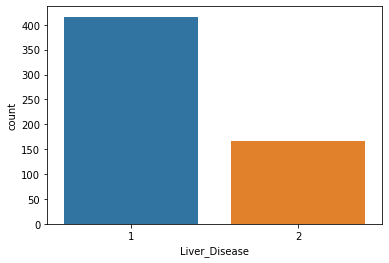

In [17]:
sns.countplot(data = data, x = 'Liver_Disease', label='Count')
LD, NLD = data['Liver_Disease'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


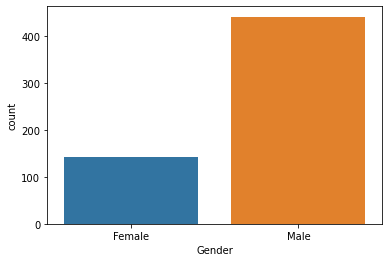

In [18]:
sns.countplot(data = data, x = 'Gender', label='Count')

M, F = data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

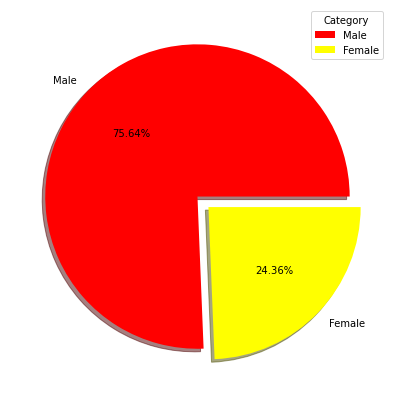

In [19]:
plt.figure(figsize=(7,7))
labels=['Male','Female']
size=data['Gender'].value_counts()
colors=['red','yellow']
explode=[0,0.1]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()

#### 75.64 % of the people are Male and 24.36% of the people are Female

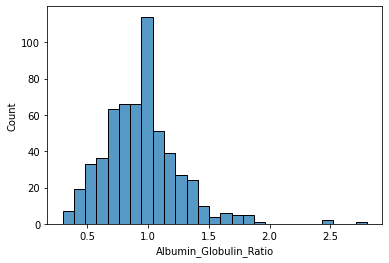

In [20]:
sns.histplot(x='Albumin_Globulin_Ratio', data=data)
plt.show()


#### Here data are normally distrubuted but sightly right skewed

In [21]:
#!pip install sweetviz  #Automated Library for visualization

import sweetviz as sv #  library for univariante analysis
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
#Bivaraite Analysis

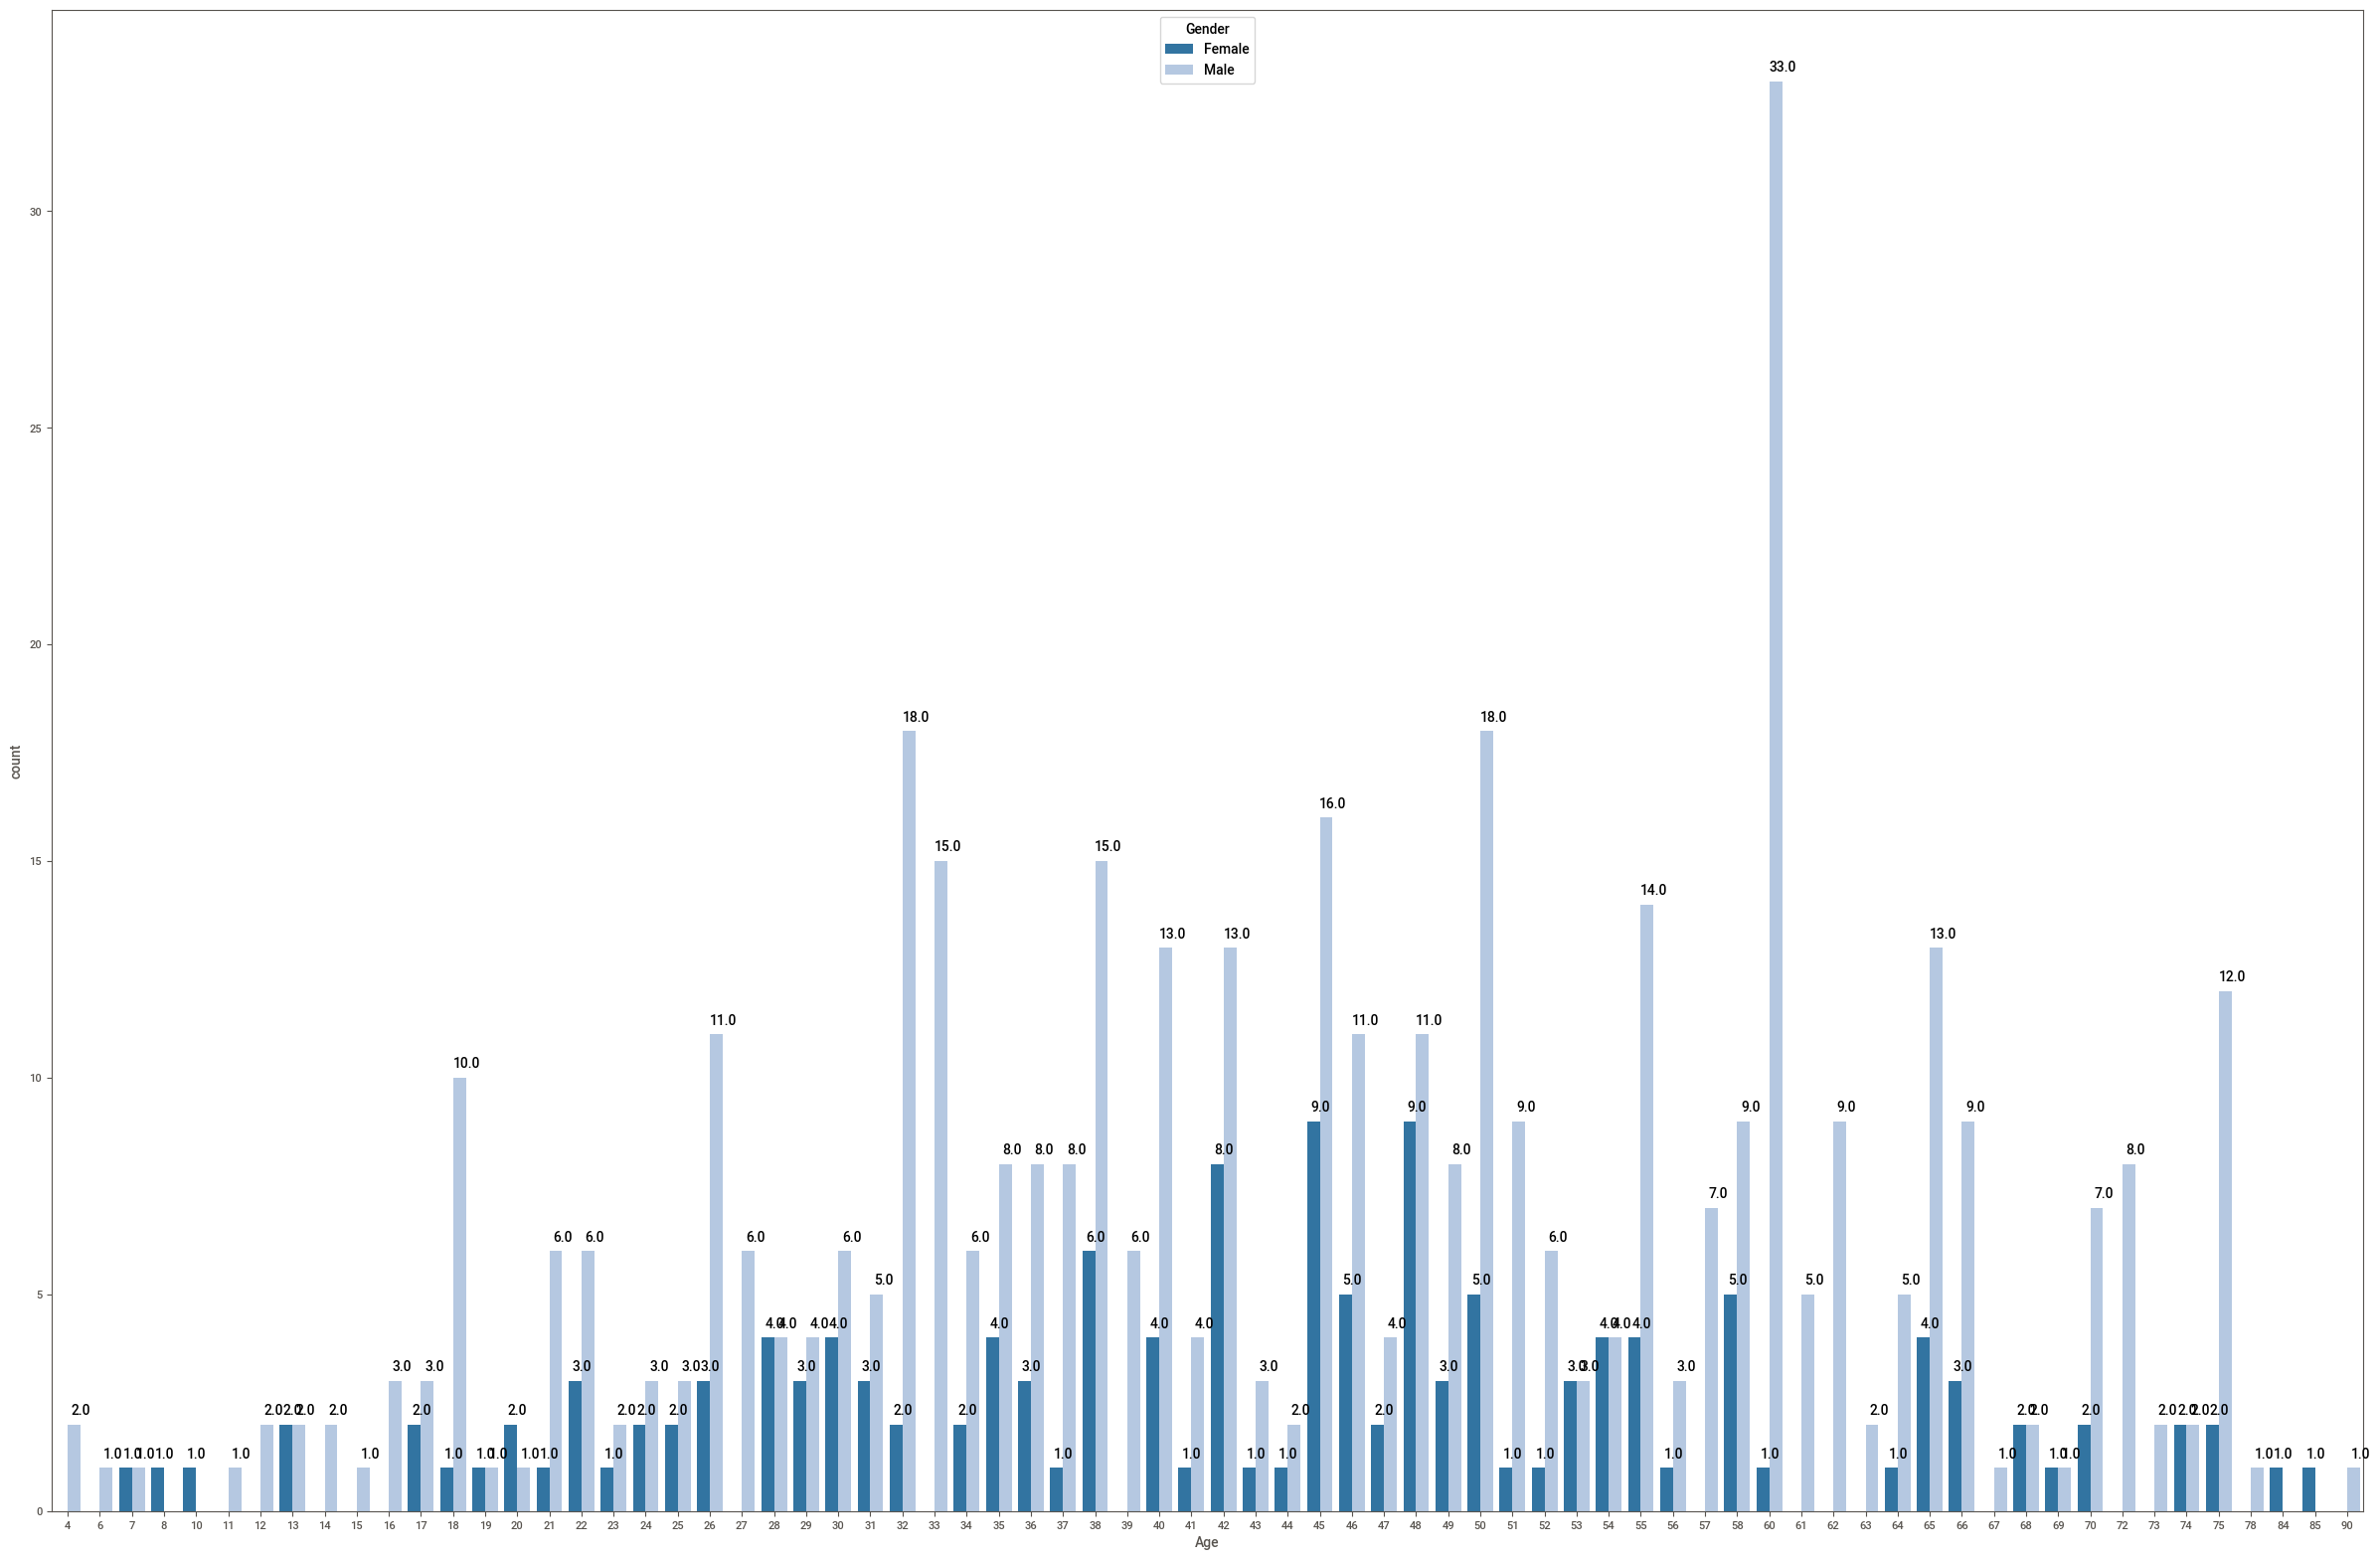

In [23]:
## Analysing Age and Gender
plt.figure(figsize=(30,20))
b=sns.countplot(x=data['Age'],hue=data['Gender'],palette='tab20')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(5, 10),textcoords='offset points')
plt.show() 

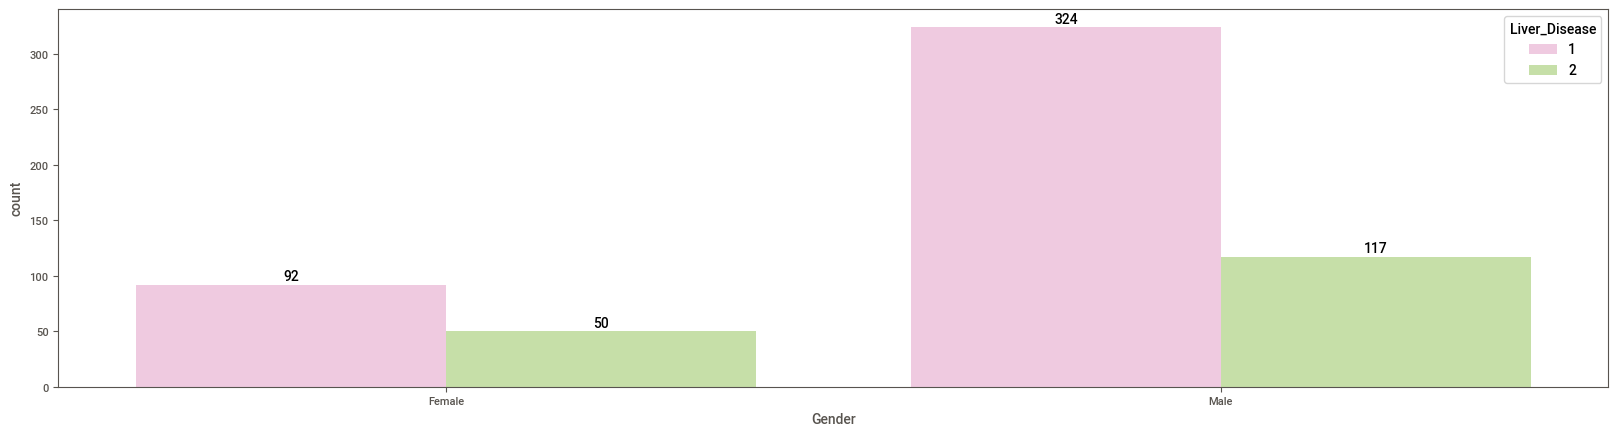

In [24]:
## Analysing Gender and  Target variable

plt.figure(figsize=(20,5))
b=sns.countplot(x=data['Gender'],hue=data['Liver_Disease'],palette='PiYG')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')

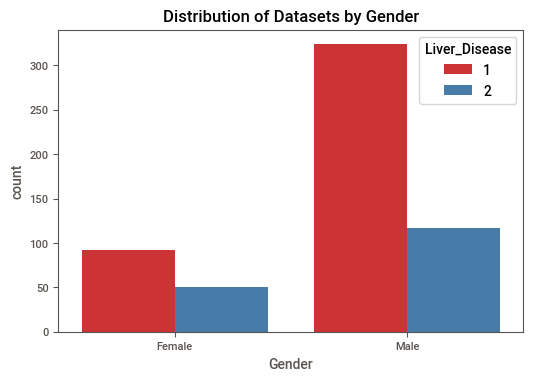

In [25]:
# Gender Distribution of 2 Dataset
sns.countplot(x='Gender',data=data,hue='Liver_Disease',palette="Set1")
plt.title('Distribution of Datasets by Gender')
plt.show()

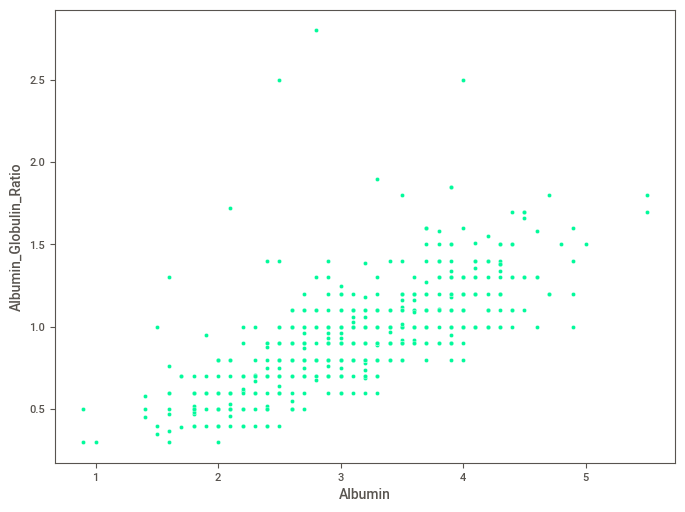

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

Let us compare the Gender based on the Protein Intake

<AxesSubplot:xlabel='Gender'>

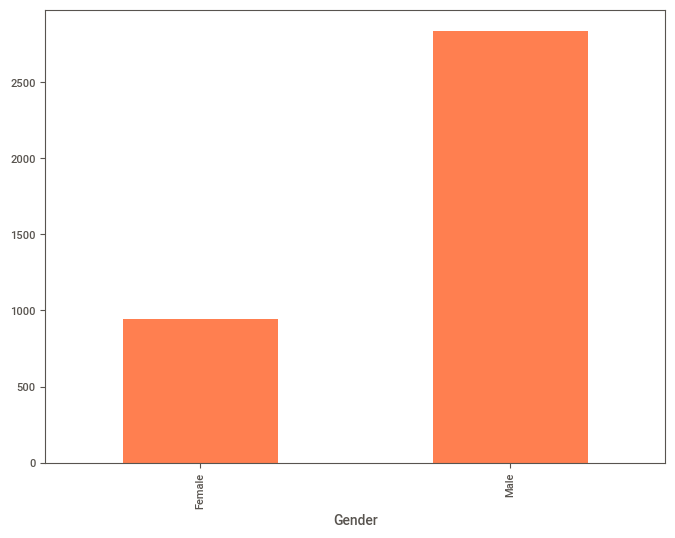

In [27]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

So protein intake is higher in Males as compared to females.

Let us compare male and female based on Albumin Level.

<AxesSubplot:xlabel='Gender'>

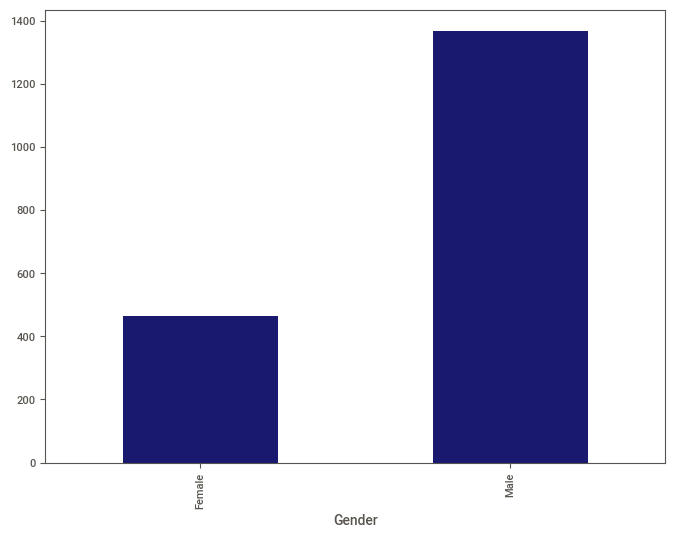

In [28]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

Albumin Level is higher in the case of male compared to female.



Finally Let us compare them based on the Bilirubin content.

<AxesSubplot:xlabel='Gender'>

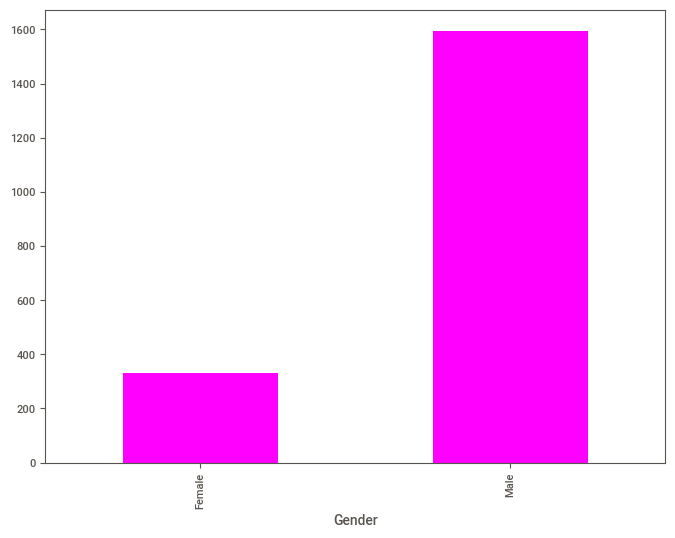

In [29]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

We can clearly see that males has more bilirubin content compared to females.

Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.

#Multivariate Analysis

<AxesSubplot:xlabel='Liver_Disease', ylabel='Total_Protiens'>

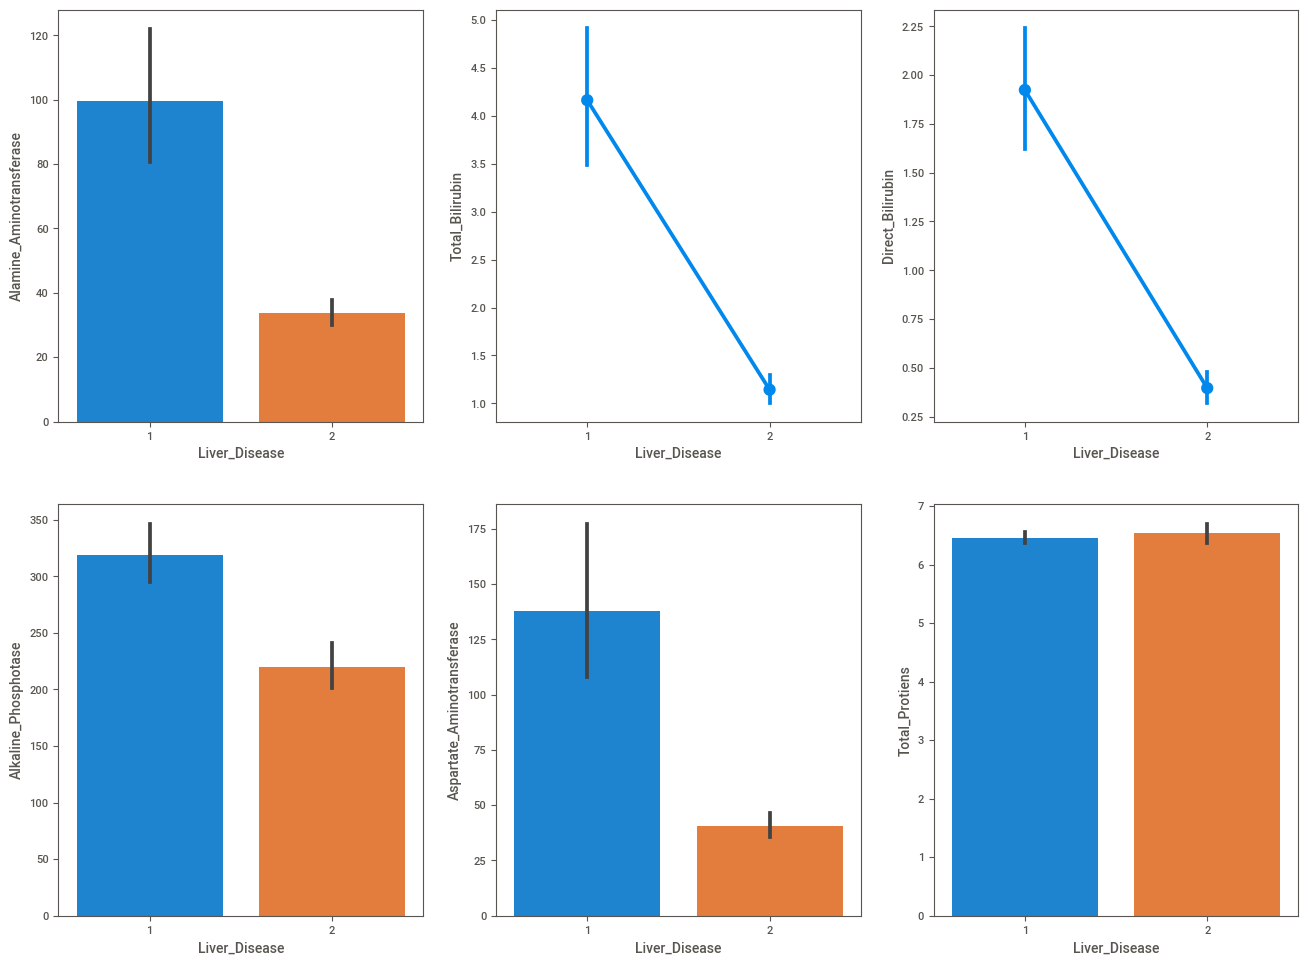

In [30]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(y = 'Alamine_Aminotransferase', x = 'Liver_Disease', data=data, ax = saxis[0,0])
sns.pointplot(y = 'Total_Bilirubin', x = 'Liver_Disease', data=data, ax = saxis[0,1])
sns.pointplot(y = 'Direct_Bilirubin', x = 'Liver_Disease', data=data, ax = saxis[0,2])


sns.barplot(y = 'Alkaline_Phosphotase', x = 'Liver_Disease', data=data, ax = saxis[1,0])
sns.barplot(y = 'Aspartate_Aminotransferase', x = 'Liver_Disease', data=data, ax = saxis[1,1])
sns.barplot(y = 'Total_Protiens', x = 'Liver_Disease', data=data, ax = saxis[1,2])

As we can see higher the values of individual test, the more risk you have of having one or more liver related diseases. So eat healthy guys!!

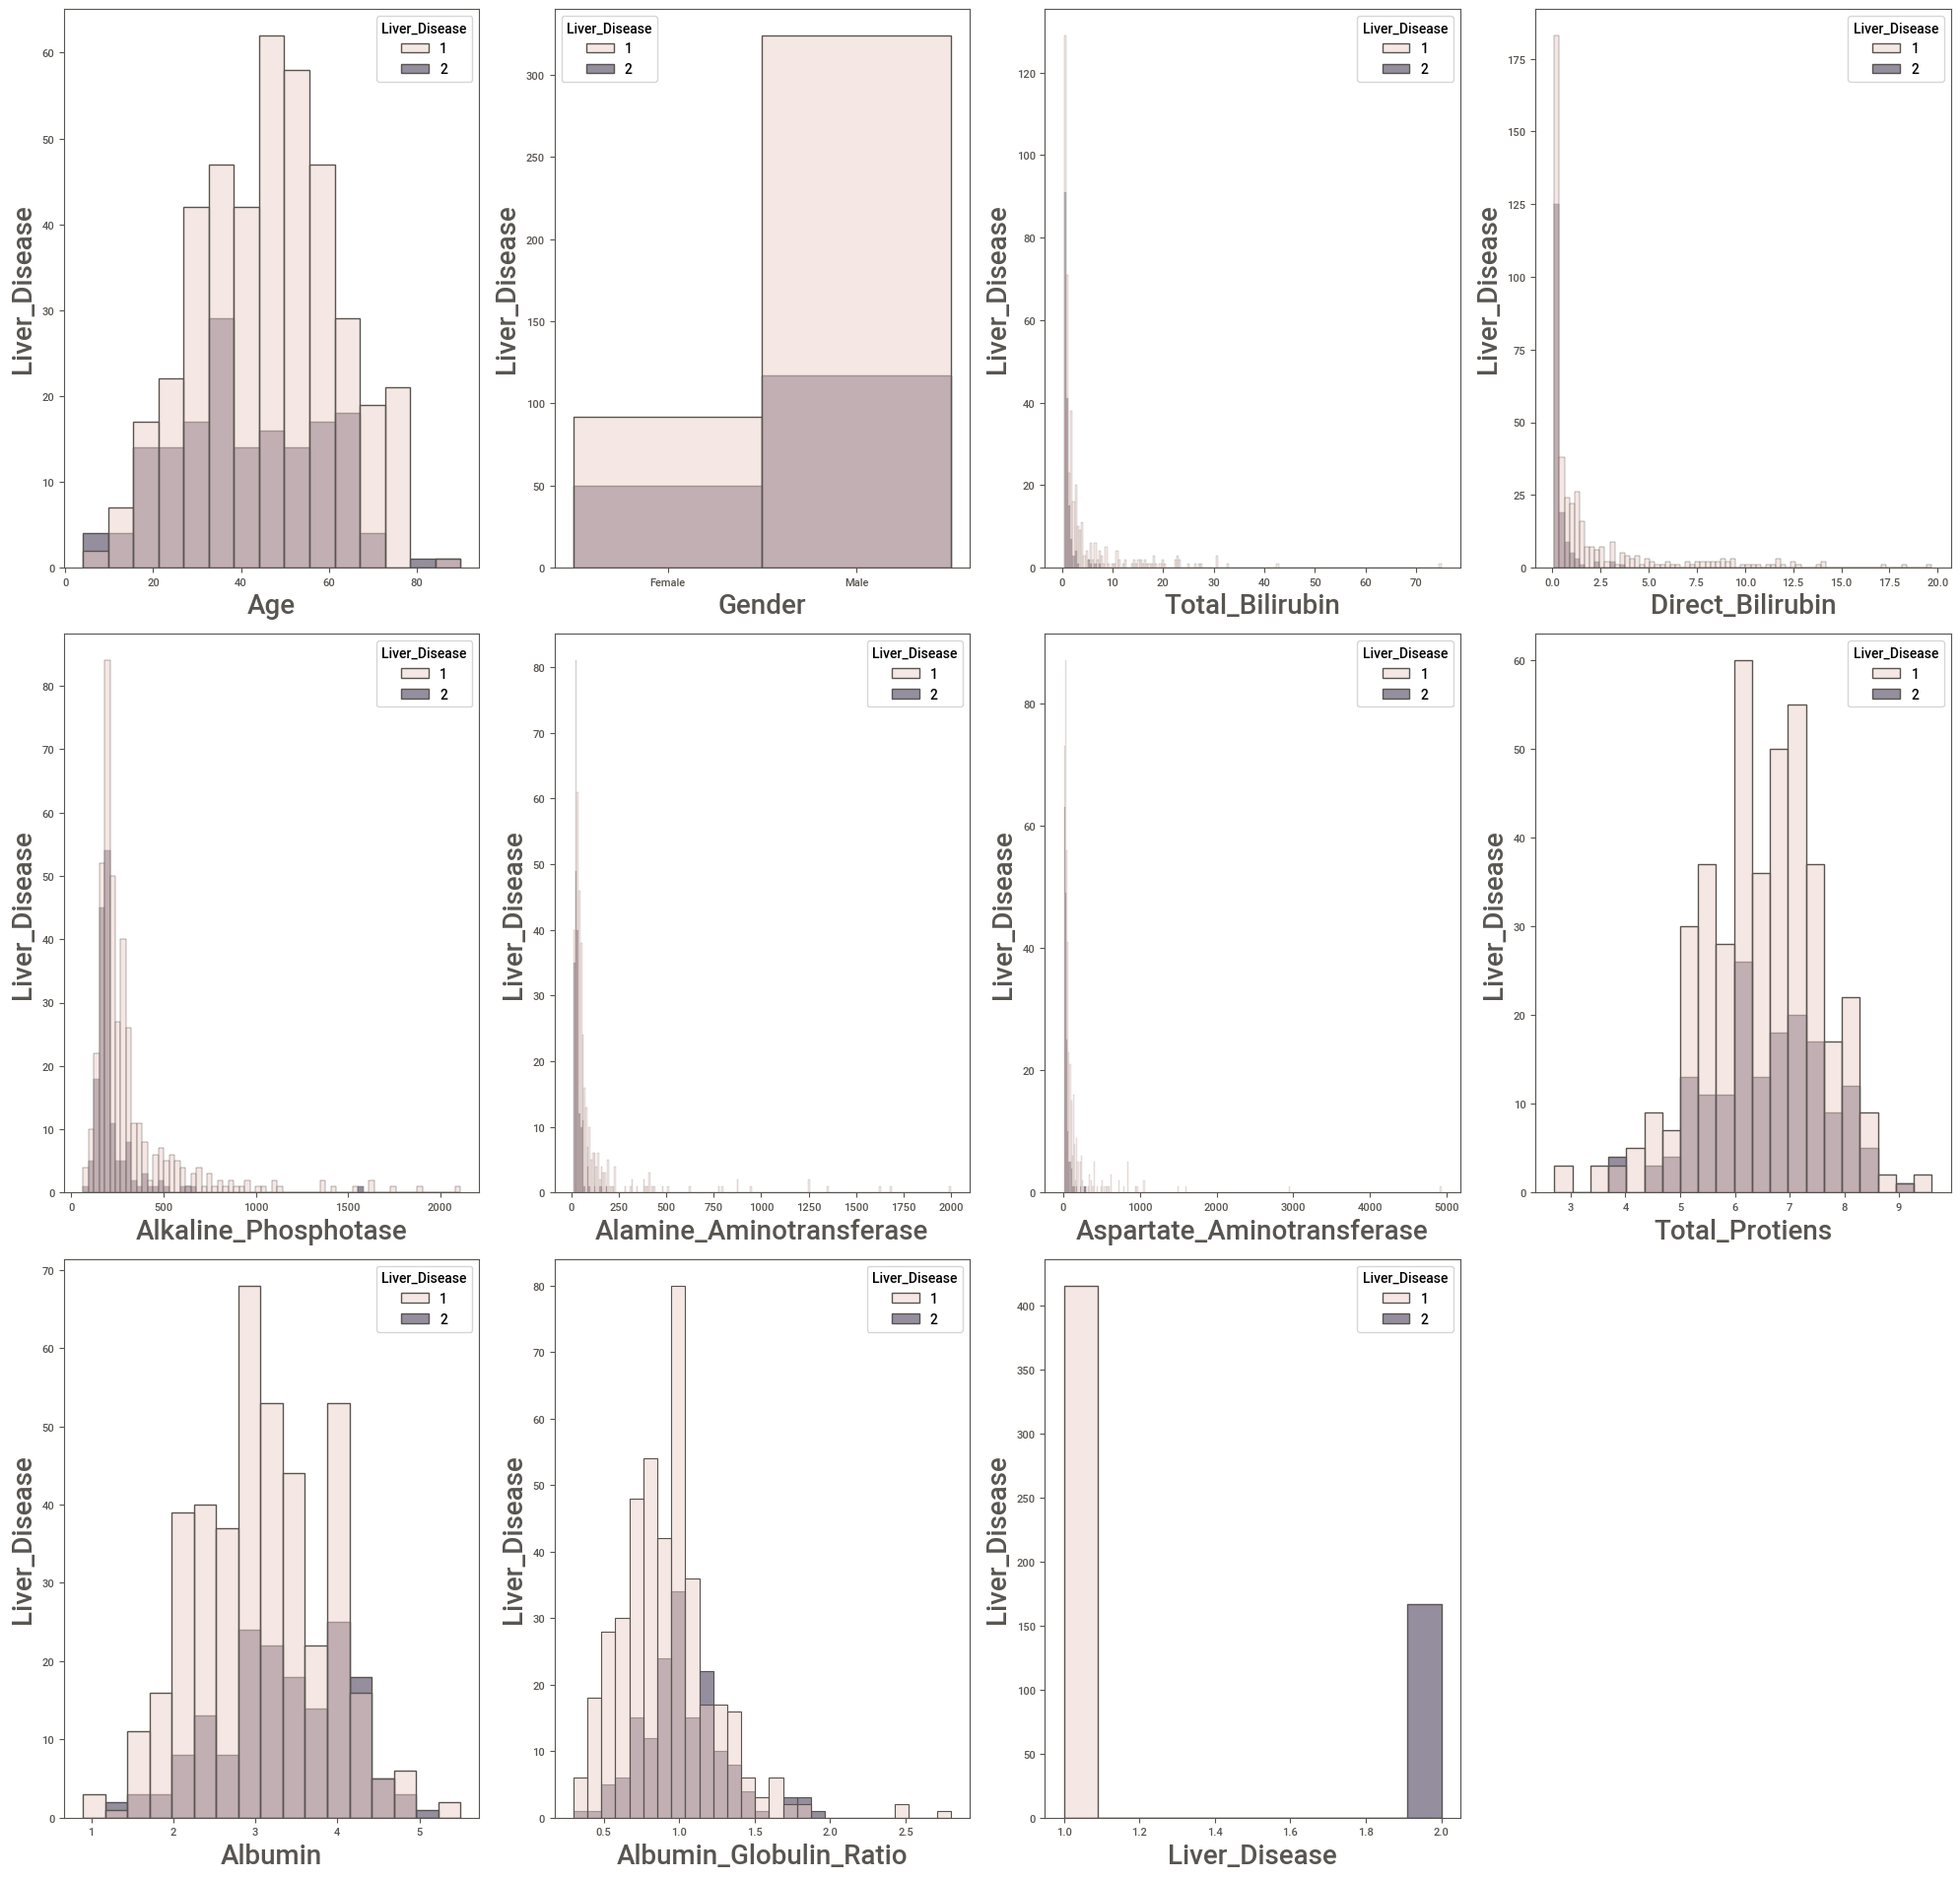

In [31]:
# Plotting how every numerical feature correlate with the target column "Liver_Disease"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data:#acessing columns form data
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=data.Liver_Disease)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Liver_Disease',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()


This  plot shows some interesting things,

1)On average, female tend not to have liver disease than male.

2)The greatest number of female without liver disease were about 38 yrs old.

3)Female around the age of 10 had liver disease, this may be a genetic link.

4)Male are more prone to liver disease (may be due to alcoholism).

5)The greatest number of male without liver diseae were about 38 yrs old.

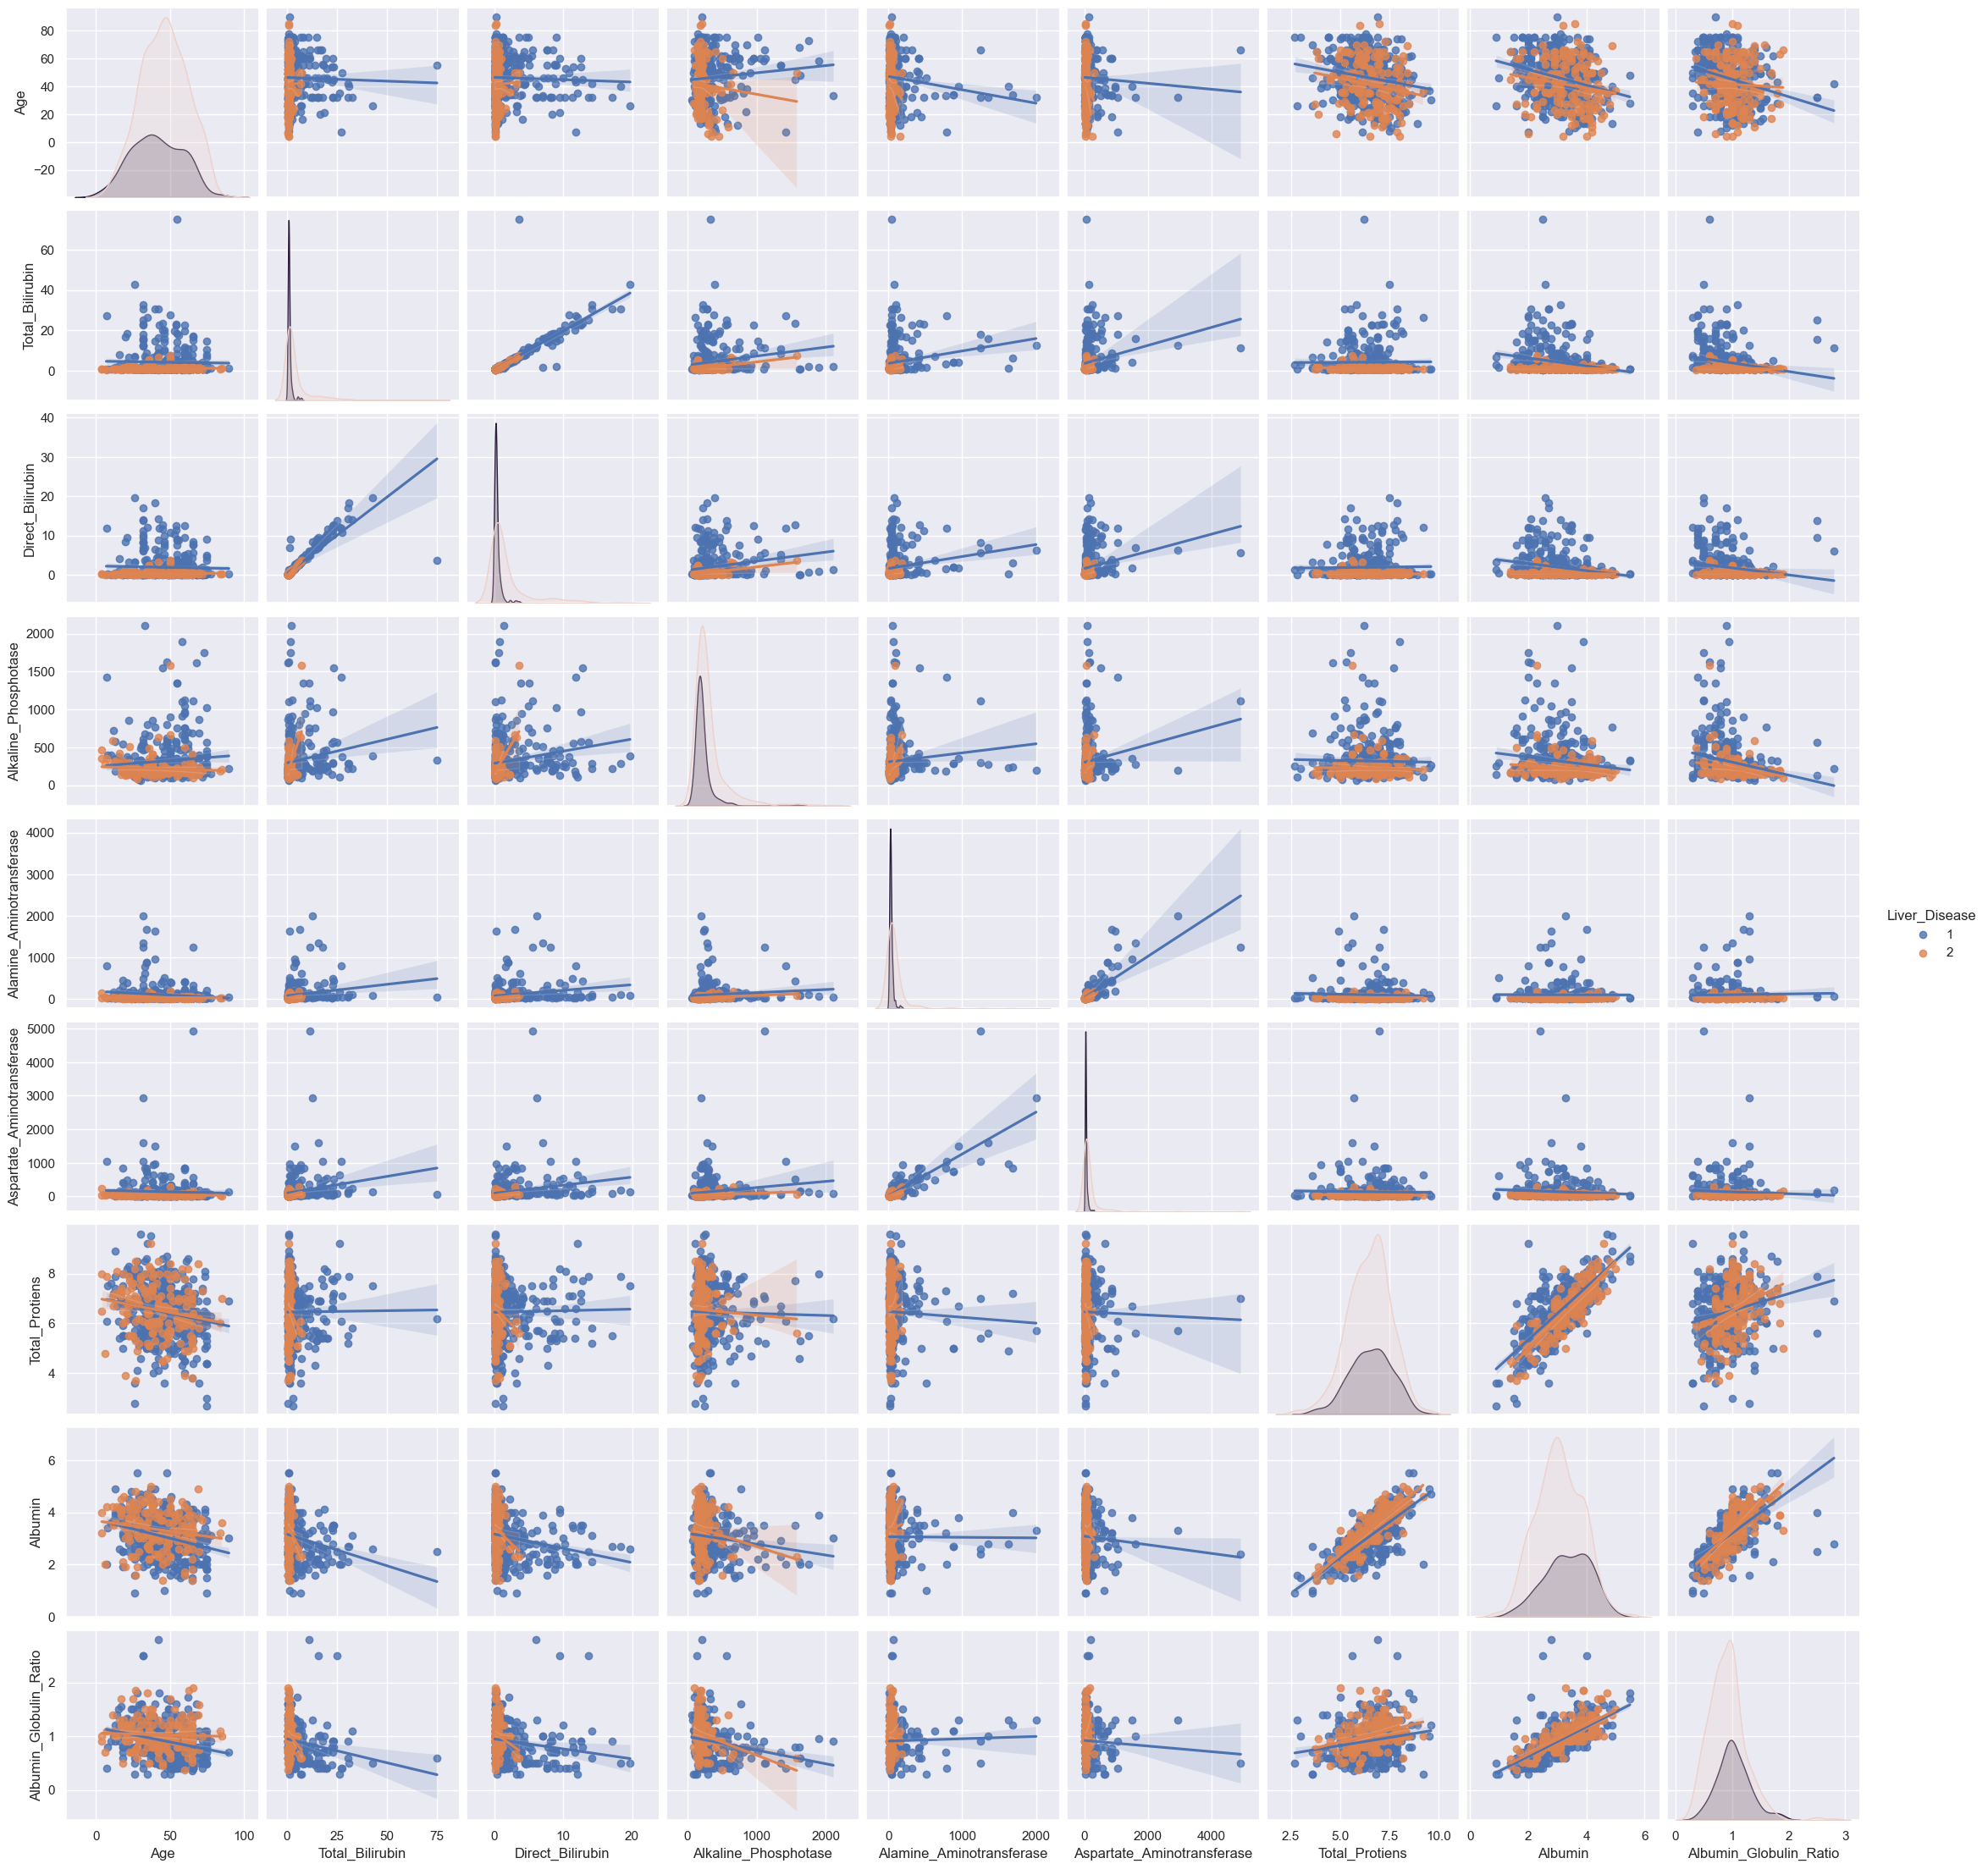

In [32]:
sns.set()
sns.pairplot(data, hue='Liver_Disease', kind='reg')

<AxesSubplot:>

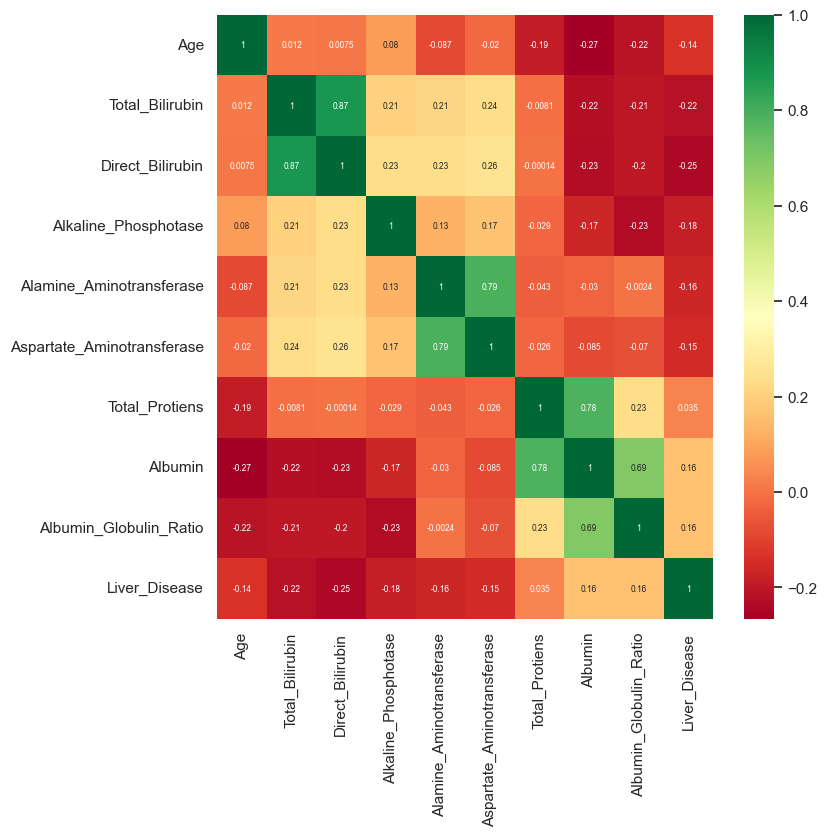

In [33]:
## Checking correlation

plt.figure(figsize=(8, 8))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":6})#plotting heat map to check correlation

Based on the pair plots & heatmap, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

In [34]:
## Analysing for continuous data

In [35]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [36]:
data1=data[['Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Albumin_Globulin_Ratio']]

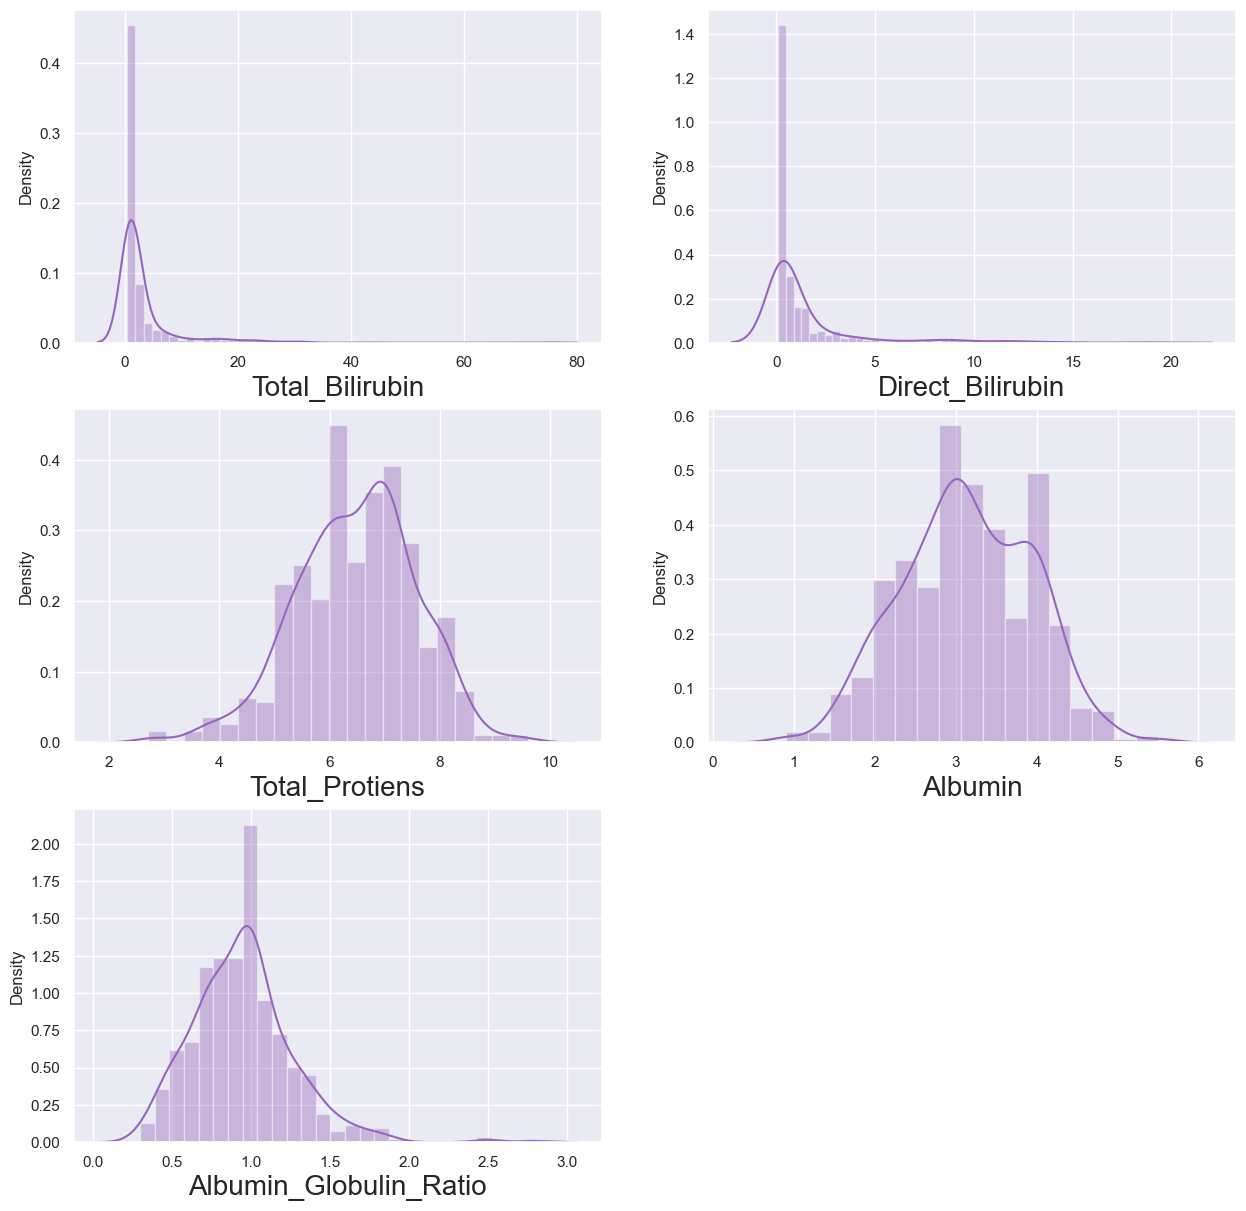

In [37]:

plt.figure(figsize=(15,15))
plotnumber=1

for column in data1:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=data1[column],color='tab:purple')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

Total_Bilirubin and Direct_Bilirubin shows standard normal distribution and Total_Protiens,Albumin and Albumin_and_Globulin_Ratio shows normal distribution

In [38]:
## Analysing Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase

In [39]:
data2 = data[['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']]

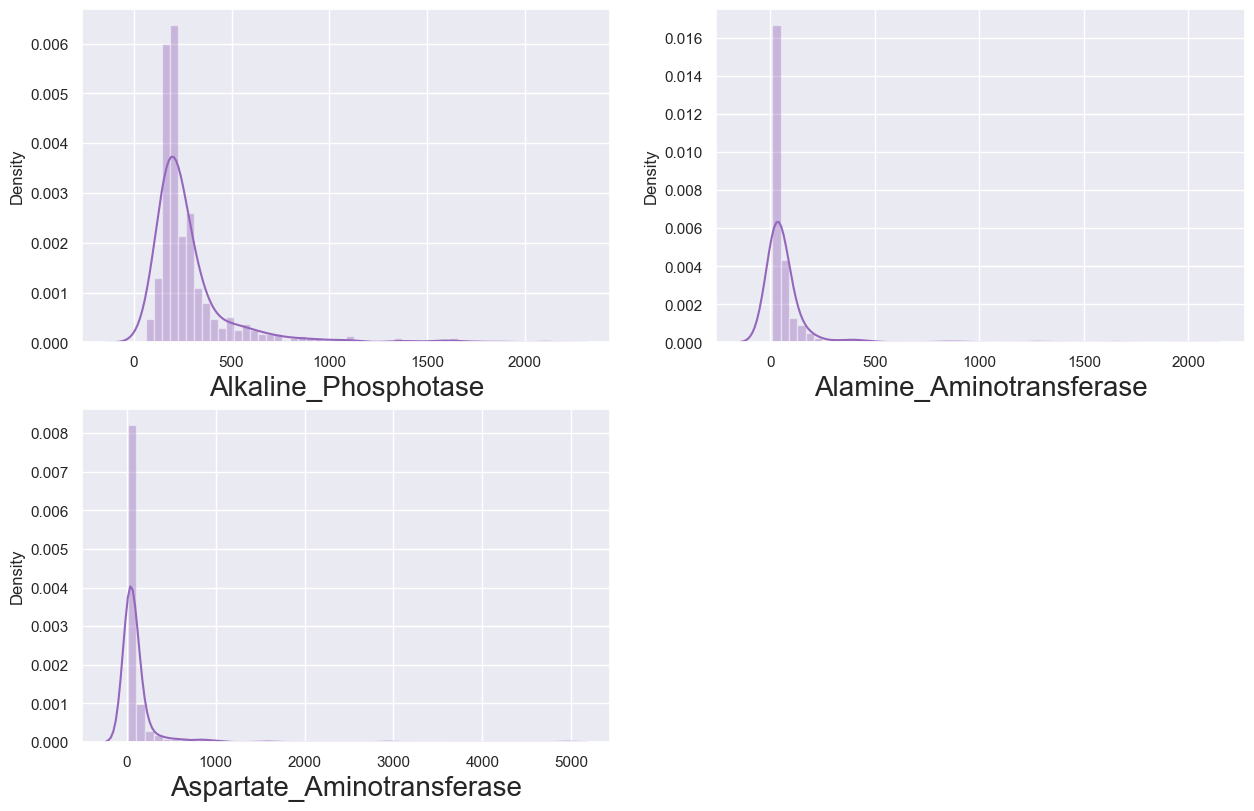

In [40]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data2:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=data2[column],color='tab:purple')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

# Data Preprocessing and Feature engineering

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Liver_Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [42]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Liver_Disease                 0
dtype: int64

#What we can see here is that the data contains (582 rows by 11 columns). This means the that data contains 582 observations + 10 features + 1 response (or target) variable. The response variable is "Liver Disease". Furthermore, data consists of 5 Floats, 5 integers and 1 object. Therefore, the goal is to convert the object to numerical values so we can apply machine learning (ML) algorithms. We also notice that the column, 'Albumin_Globulin_Ratio ' contains missing values (Nan).

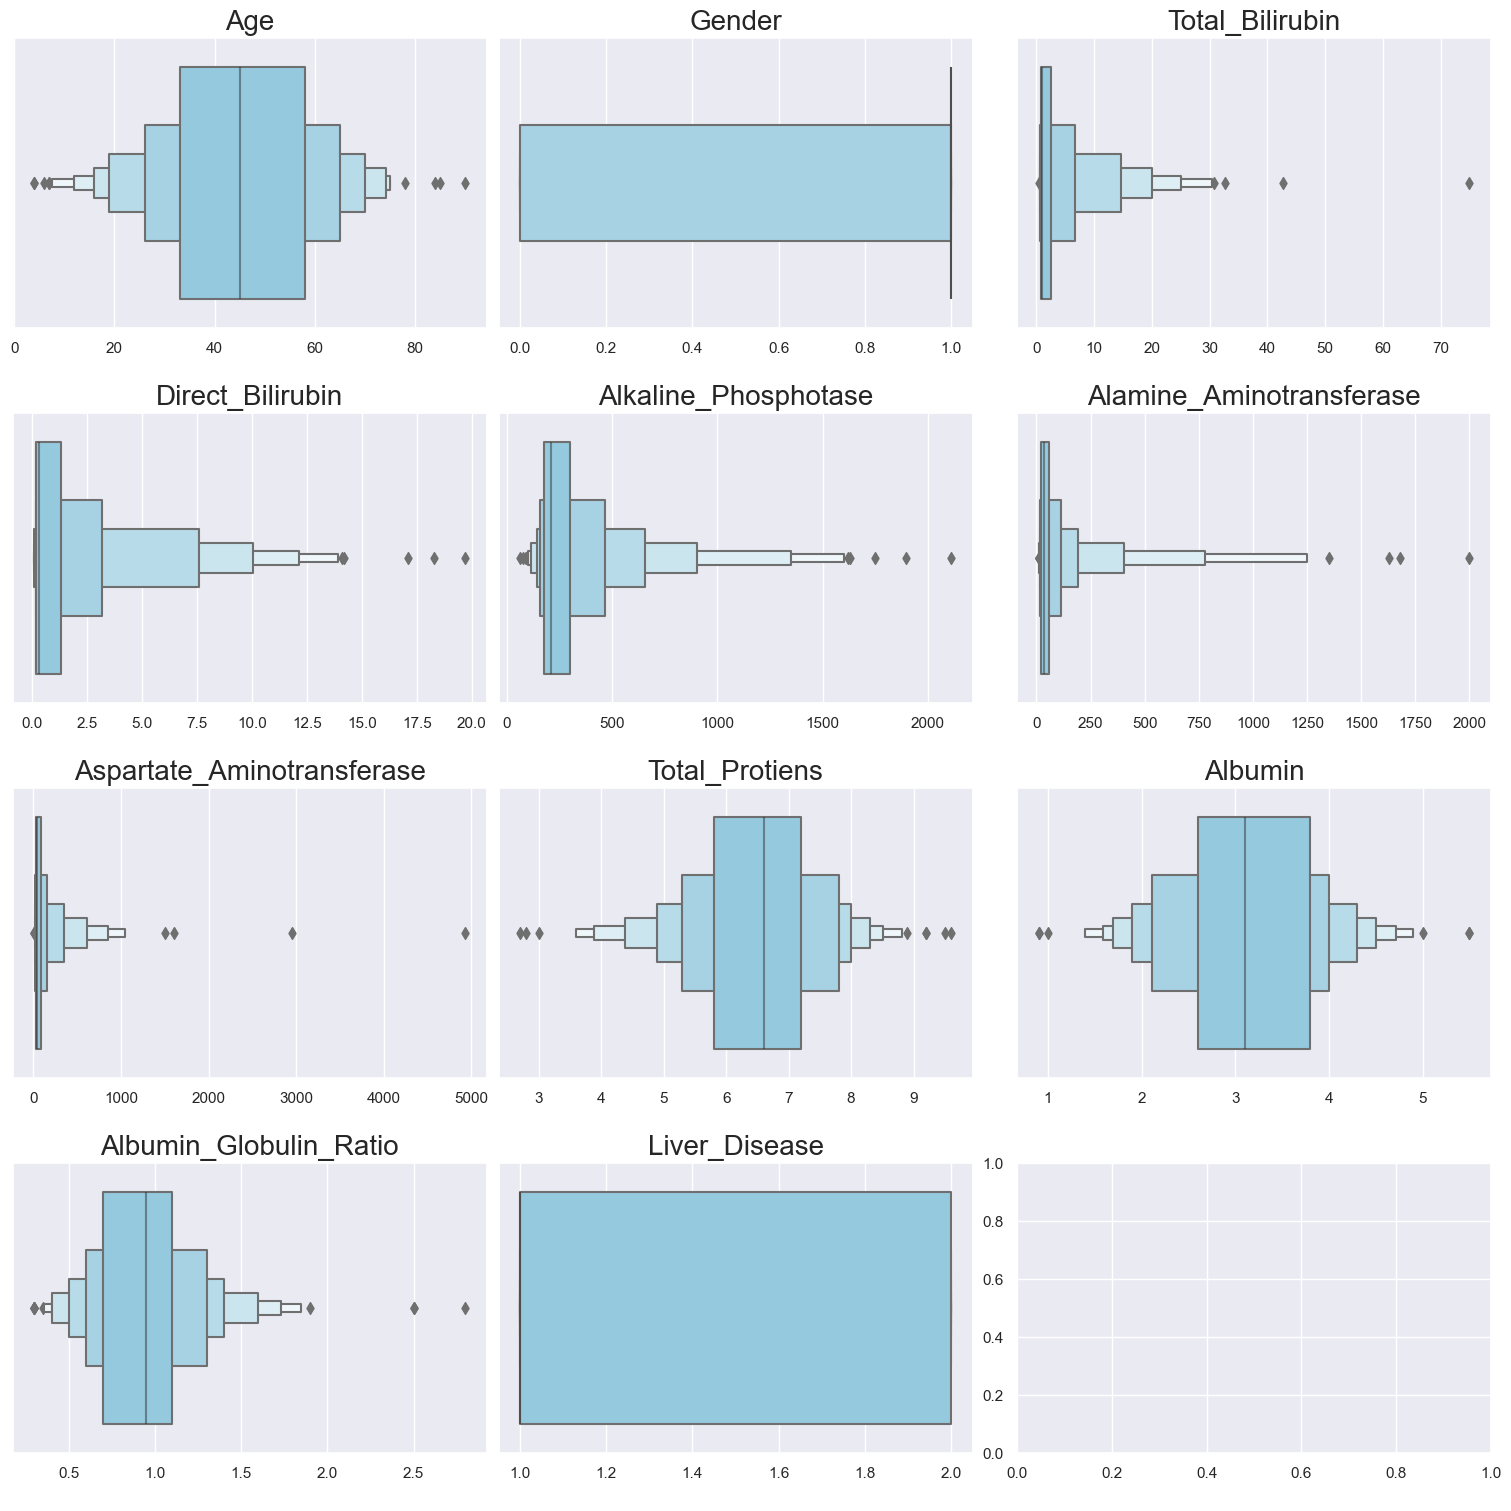

In [96]:
##Checking for OUtliers
#use of boxenplot
fig, axs = plt.subplots(4, 3, figsize=(15, 15), constrained_layout=True)

for ax, column in zip(axs.flat, data.loc[:, data.dtypes != 'object'].columns):
    ax.set_title(f'{column}', fontsize=20);
    
    
    sns.boxenplot(data=data, x=column,color="skyblue", ax=ax);
    ax.set_xlabel(xlabel='  ');

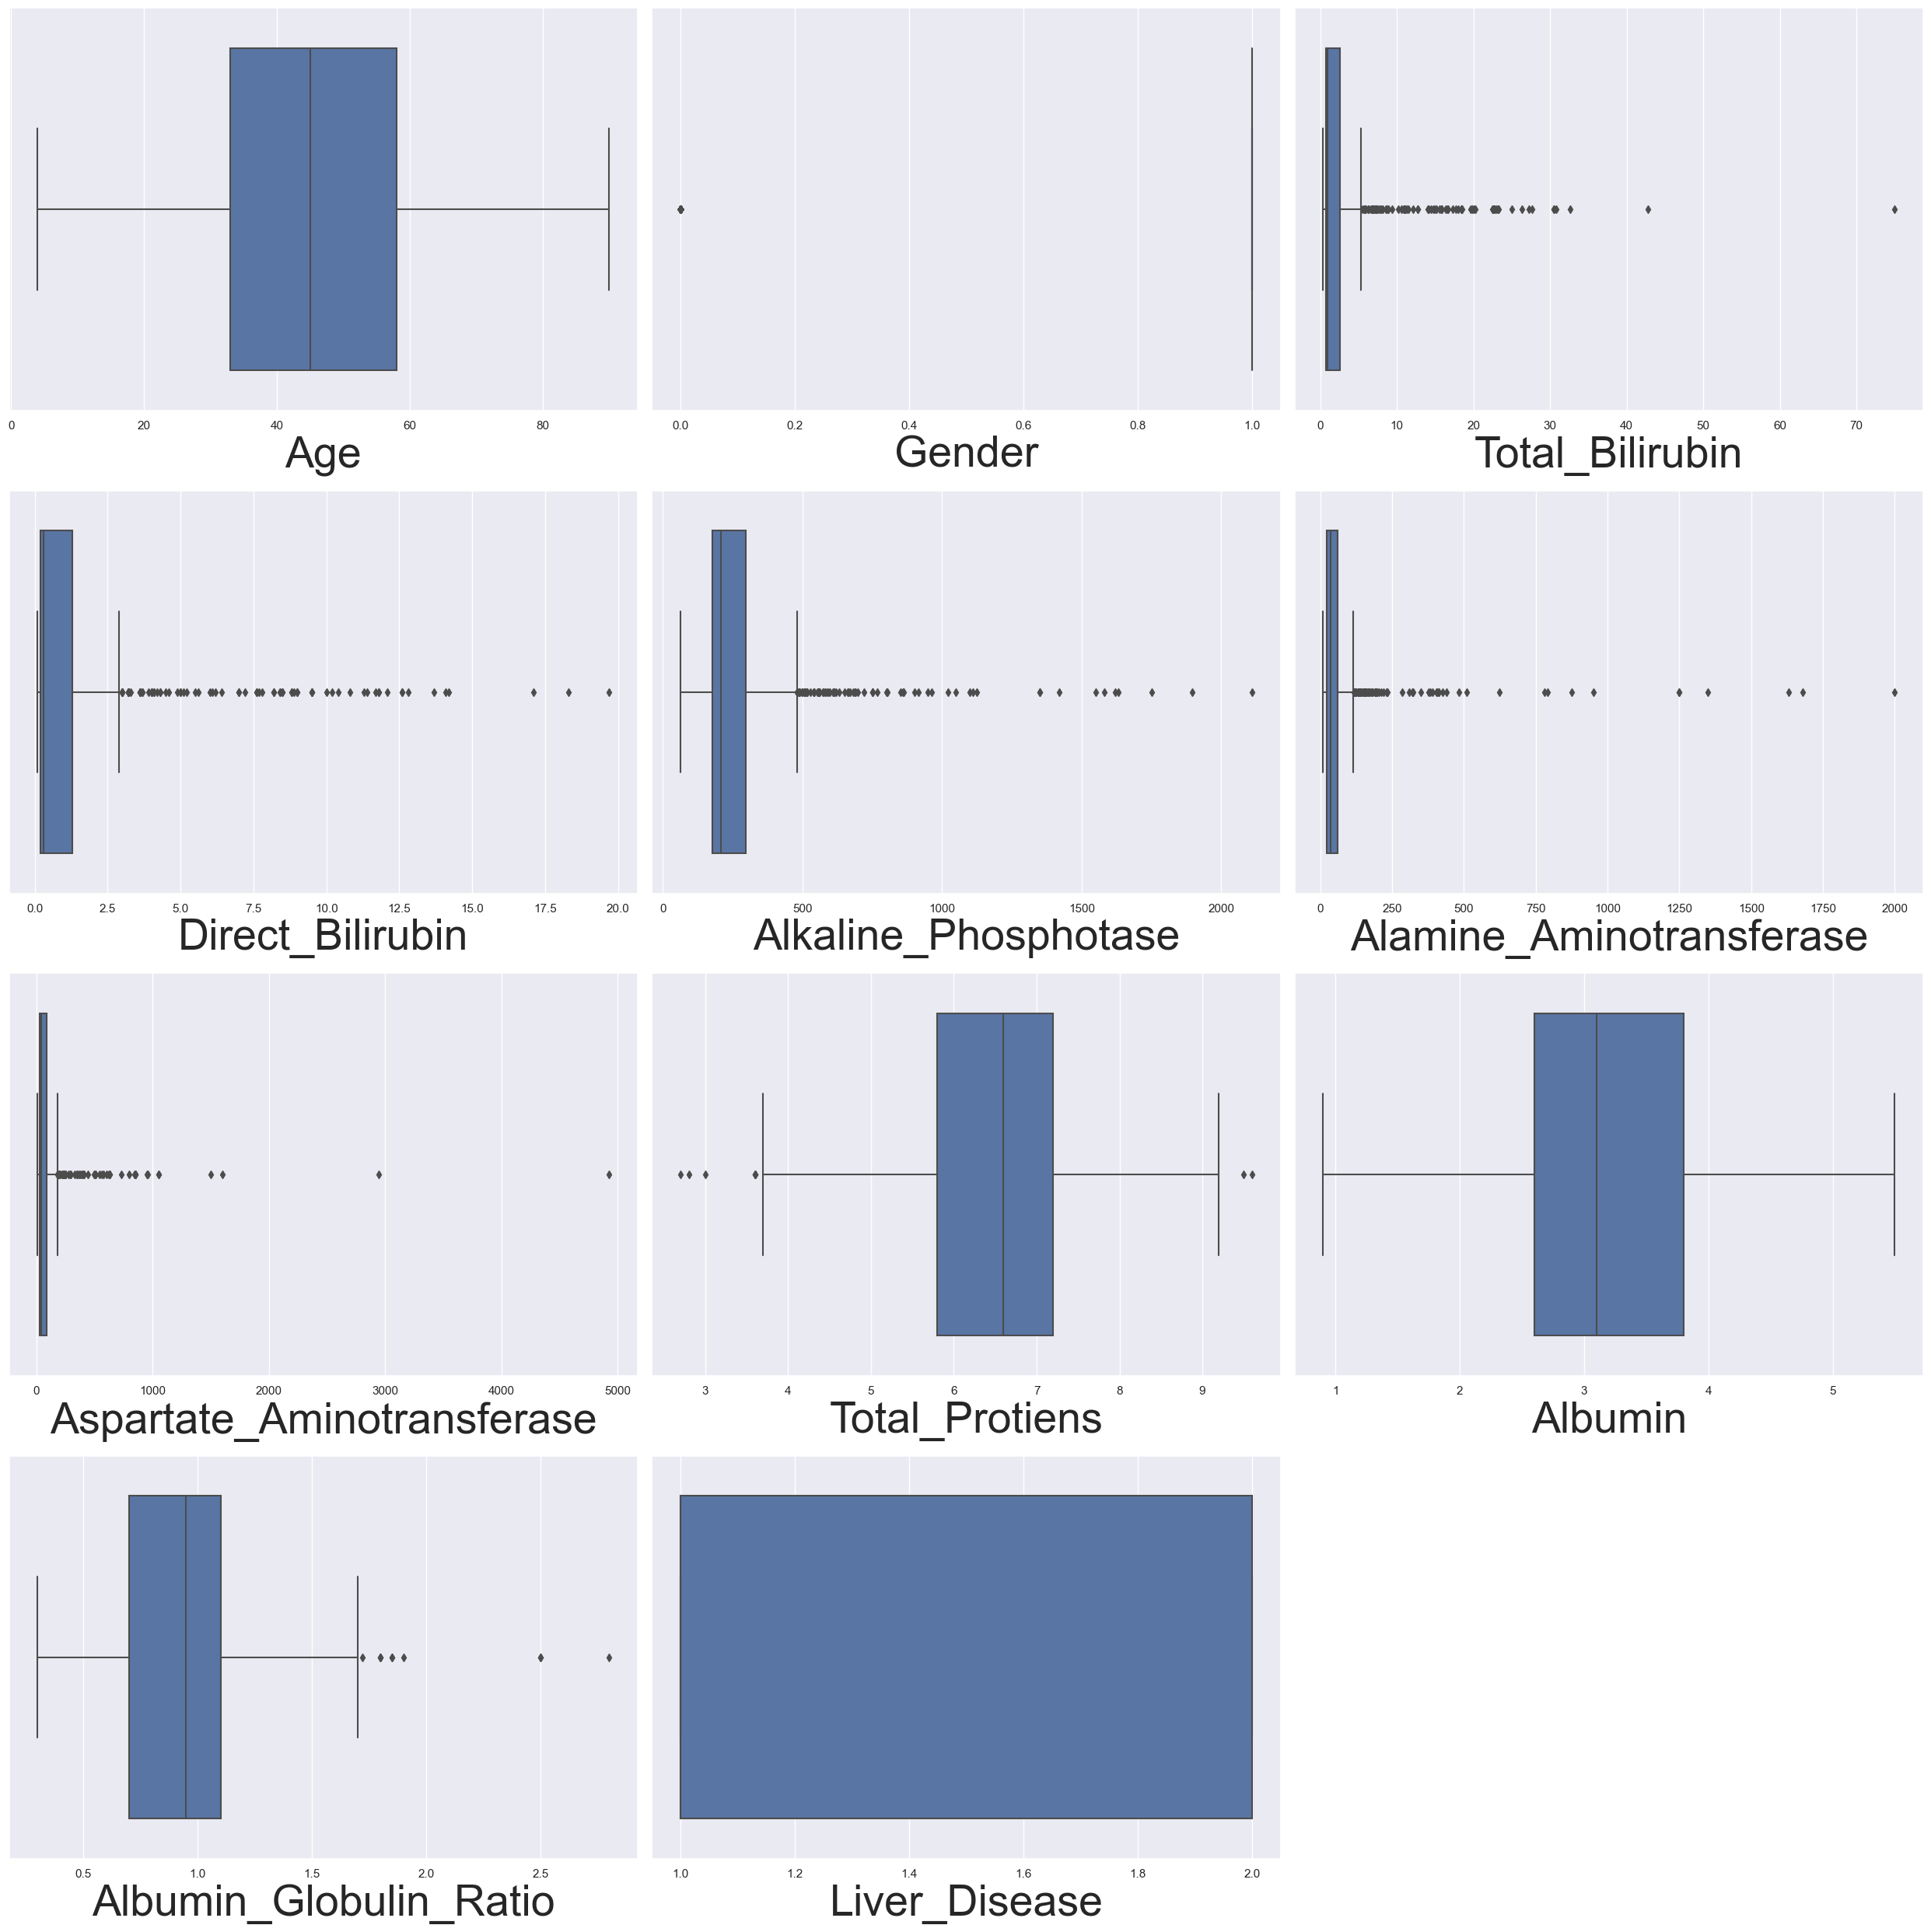

In [97]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in data:
    if(plotnum<14):
        ax=plt.subplot(4,3,plotnum)
        sns.boxplot(data[c])
        plt.xlabel(c,fontsize=40)
    plotnum+=1
plt.tight_layout()   

#### From this Boxplot it is clear that, there are alots of outliers in the data provided for most of the variables. outliers being checked for target variable that is Liver disease....But as per medical data we are not require to worry about outliers............outliers are not always bad data points.Sometimes they are the most important data of all.

In [43]:
#How can we handle the missing values????

In [44]:
## Getting the rows where values are missed in Albumin_and_Globulin_Ratio features
data.loc[data['Albumin_Globulin_Ratio' ].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [45]:
## Checking the distribution along the both labels
data.Albumin_Globulin_Ratio.value_counts()  

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
0.58      1
0.69      1
1.27      1
1.12      1
0.37      1
Name: Albumin_Globulin_Ratio, Length: 69, dtype: int64

In [46]:
## Checking the percentage of missing values for Albumin_Globulin_Ratio column
data.Albumin_Globulin_Ratio.isnull().sum()/len(data)*100

0.6861063464837049

In [47]:
data.Albumin_Globulin_Ratio.isnull().sum()

4

In [48]:
data.loc[data['Albumin_Globulin_Ratio'].isnull()==True,'Albumin_Globulin_Ratio']=np.mean(data.Albumin_Globulin_Ratio.dropna(axis=0))

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      583 non-null    float64
 10  Liver_Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [50]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        0
Liver_Disease                 0
dtype: int64

2.Conversion of categorical column into numerical column

In [51]:
data.Gender.value_counts()#checking counts for each labels

Male      441
Female    142
Name: Gender, dtype: int64

In [52]:
## conversion into numerical 
# ON The basis of count 
#data.loc[data['Gender']=='Male','Gender_of_the_patient']=1
#data.loc[data['Gender']=='Female','Gender_of_the_patient']=0

In [53]:
## Using label encoder to convert the categorical data to numerical data (Gender)

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)

In [54]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [55]:
#checking for duplicate rows
data.duplicated().sum()

13

In [56]:
#Dropping duplicate columns
data= data.drop_duplicates()

In [57]:
data.duplicated().sum()

0

In [58]:
# Droping 'Direct_Bilirubin' feature:
#data = data.drop('Direct_Bilirubin', axis=1)


In [59]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [60]:
## defining X and y
X=data[['Gender','Total_Bilirubin','Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_Globulin_Ratio']]
y=data.Liver_Disease

In [61]:
X


,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio
0,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [62]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Liver_Disease, Length: 570, dtype: int64

In [63]:
data.Liver_Disease.value_counts()   # that data imbalanced ,where can we see .....

1    406
2    164
Name: Liver_Disease, dtype: int64

In [64]:
## Balancing the data

# Install imblearn package - pip install imblearn
!pip install --user imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [65]:
X_smote, y_smote = smote.fit_resample(X,y)

In [66]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 406, 2: 164})
SMOTE Classes Counter({1: 406, 2: 406})


In [67]:
# Importing modules from sklearn library.................
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# Evaluating the model..........................

from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(568, 9)
(568,)
(244, 9)
(244,)


Logistic Regression Training Score: 
 70.25
Logistic Regression Test Score: 
 70.9
Coefficient: 
 [[-2.28313097e-01  1.59629111e-02 -7.31860113e-01 -3.71661581e-04
  -1.43731618e-02 -3.81353207e-03 -2.20339292e-01  4.66860456e-01
   5.57987699e-01]]
Intercept: 
 [0.87411897]
Accuracy: 
 0.7090163934426229
Precision: 
 0.782608695652174
recall: 
 0.5853658536585366
f1_score: 
 0.6697674418604651
AUC: 
 0.7100382987300948
Confusion Matrix: 
 [[ 72  51]
 [ 20 101]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.59      0.67       123
           2       0.66      0.83      0.74       121

    accuracy                           0.71       244
   macro avg       0.72      0.71      0.70       244
weighted avg       0.72      0.71      0.70       244



<AxesSubplot:>

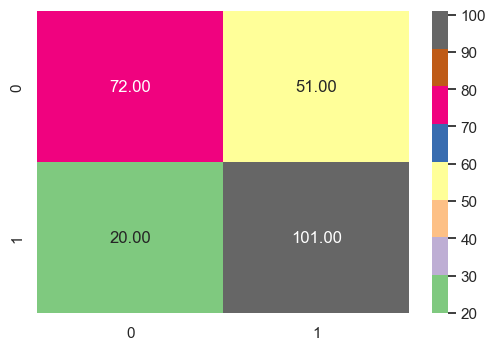

In [69]:
#Logistic Regression

# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Precision: \n', precision_score(y_test,log_predicted))
print('recall: \n', recall_score(y_test,log_predicted))
print('f1_score: \n', f1_score(y_test,log_predicted))
print('AUC: \n', roc_auc_score(y_test, log_predicted))
print('Confusion Matrix: \n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))



sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt=".2f",cmap = 'Accent')


Gaussian Score: 
 68.84
Gaussian Test Score: 
 70.9
Accuracy: 
 0.7090163934426229
[[ 60  63]
 [  8 113]]
              precision    recall  f1-score   support

           1       0.88      0.49      0.63       123
           2       0.64      0.93      0.76       121

    accuracy                           0.71       244
   macro avg       0.76      0.71      0.69       244
weighted avg       0.76      0.71      0.69       244



<AxesSubplot:>

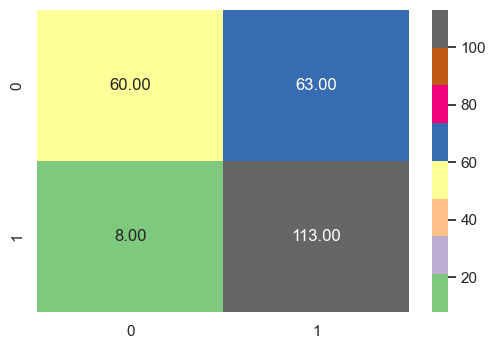

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt=".2f",cmap = 'Accent')


Random Forest Score: 
 100.0
Random Forest Test Score: 
 76.64
Accuracy: 
 0.7663934426229508
[[90 33]
 [24 97]]
              precision    recall  f1-score   support

           1       0.79      0.73      0.76       123
           2       0.75      0.80      0.77       121

    accuracy                           0.77       244
   macro avg       0.77      0.77      0.77       244
weighted avg       0.77      0.77      0.77       244



<AxesSubplot:>

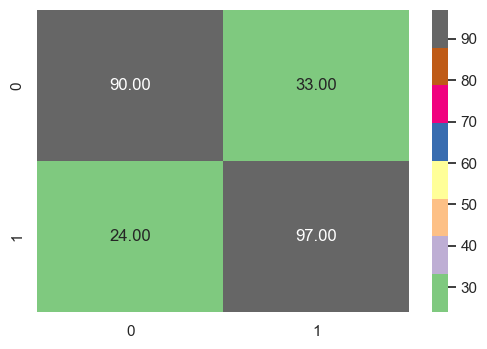

In [71]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))



sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt=".2f",cmap = 'Accent')


Score of the model is -  77.11
Report card of this model - 
              precision    recall  f1-score   support

           1      0.688     0.520     0.593       123
           2      0.609     0.760     0.676       121

    accuracy                          0.639       244
   macro avg      0.649     0.640     0.635       244
weighted avg      0.649     0.639     0.634       244

Accuracy score -  0.639344262295082
AUC: 
 0.6403278908822145


<AxesSubplot:>

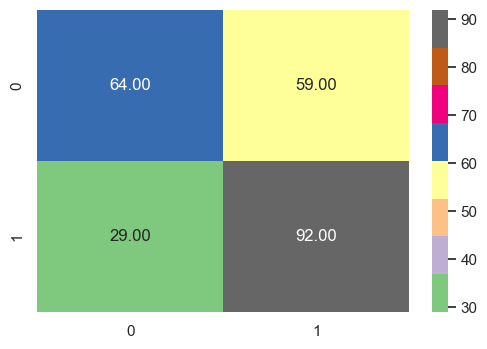

In [72]:
#knn

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predicted_knn = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)


score = knn.score(X_test, y_test)
print("Score of the model is - ",knn_score)
print("Report card of this model - ")
print(classification_report(y_test, y_predicted_knn, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_predicted_knn))
print('AUC: \n', roc_auc_score(y_test, y_predicted_knn))





sns.heatmap(confusion_matrix(y_test,y_predicted_knn),annot=True,fmt=".2f",cmap = 'Accent')




Score of the model is -  0.7090163934426229
Report card of this model - 
              precision    recall  f1-score   support

           1      0.724     0.683     0.703       123
           2      0.695     0.736     0.715       121

    accuracy                          0.709       244
   macro avg      0.710     0.709     0.709       244
weighted avg      0.710     0.709     0.709       244

Accuracy score -  0.7090163934426229


<AxesSubplot:>

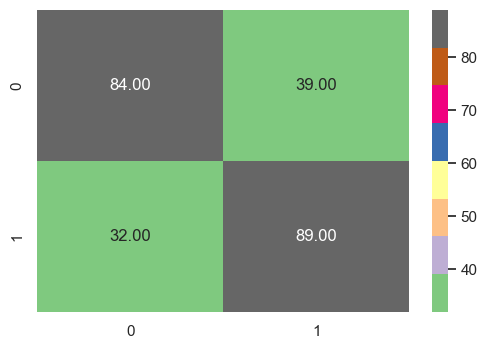

In [73]:
# Decission tree
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
Dtree.fit(X_train,y_train)
y_predicted_dtree = Dtree.predict(X_test)
Dtree_score = round(Dtree.score(X_train, y_train) * 100, 2)
Dtree_score_test = round(Dtree.score(X_test, y_test) * 100, 2)




score = Dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(classification_report(y_test, y_predicted_dtree, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_predicted_dtree))



sns.heatmap(confusion_matrix(y_test,y_predicted_dtree),annot=True,fmt=".2f",cmap = 'Accent')


In [74]:
from sklearn.model_selection import GridSearchCV
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],  #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=5)



tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})


In [75]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [76]:
tree_cv.best_score_ #getting best score from cv

0.7206754020014469

In [77]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf= 4,min_samples_split=2,splitter='random')#passing best parameter to decision tree

In [78]:
dt1.fit(X_train,y_train)#training model with best parameter

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, splitter='random')

In [79]:
y_p_tr = dt1.predict(X_train)

In [80]:
train_f1 = f1_score(y_train,y_p_tr)

In [81]:
train_f1

0.7283702213279679

In [82]:
Y_hat1 = dt1.predict(X_test)#predicting
#y_hat1

In [83]:
acc_test=accuracy_score(y_test,Y_hat1)#checking accuracy
acc_test

0.7090163934426229

In [84]:
test_f1=f1_score(y_test,Y_hat1)#f1_score
test_f1

0.6697674418604651

In [85]:
print(classification_report(y_test,Y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           1       0.78      0.59      0.67       123
           2       0.66      0.83      0.74       121

    accuracy                           0.71       244
   macro avg       0.72      0.71      0.70       244
weighted avg       0.72      0.71      0.70       244



In [86]:
## Installing XGB library
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 416 to 523
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      568 non-null    int32  
 1   Total_Bilirubin             568 non-null    float64
 2   Direct_Bilirubin            568 non-null    float64
 3   Alkaline_Phosphotase        568 non-null    int64  
 4   Alamine_Aminotransferase    568 non-null    int64  
 5   Aspartate_Aminotransferase  568 non-null    int64  
 6   Total_Protiens              568 non-null    float64
 7   Albumin                     568 non-null    float64
 8   Albumin_Globulin_Ratio      568 non-null    float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 42.2 KB


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [89]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price
score = xgb_r.score(X_test, y_test)
score


0.12704918032786885

In [90]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accur_score = round(accuracy_score(y_test, y_pred)*100,2)
print("The Accuracy score is:",accur_score)


[[ 92  31]
 [ 21 100]]
The Accuracy score is: 78.69


In [95]:
##Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','KNeighborsClassifier','DecissionTree','GridSearchCV', 
             'Xg boost'],
    'Score': [ logreg_score, gauss_score, random_forest_score,knn_score,Dtree_score,test_f1,score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,knn_score_test,Dtree_score_test,acc_test,accur_score]})

models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
6,Xg boost,0.127049,78.690000
2,Random Forest,100.000000,76.640000
0,Logistic Regression,70.250000,70.900000
1,Gaussian Naive Bayes,68.840000,70.900000
4,DecissionTree,76.410000,70.900000
3,KNeighborsClassifier,77.110000,63.930000
5,GridSearchCV,0.669767,0.709016


### Conclusion - Maximum accuracy of 78.69% is achieved. This accuracy has been achieved with XgBoost!!

## Can liver disease be prevented?
#### You can take steps to prevent some types of liver disease — especially those affected by your diet and lifestyle. If you are at risk for liver disease, your provider may recommend lifestyle changes including:

#### Avoiding or limiting alcohol. Avoiding foods and drinks that contain trans fats or high-fructose corn syrup. Carefully managing your intake of prescription and over-the-counter medications to avoid liver damage, as medications like acetaminophen (Tylenol®) are a common cause of liver injury. Getting regular exercise. Limiting consumption of red meat. You can minimize the likelihood of contracting viral hepatitis by practicing safe sex and not sharing needles.